In [1]:
import time
import requests
#import bs4
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
url = 'https://fr.meteocast.net/sunrise-sunset/fr/paris/'
cls = "ay"

In [3]:
# import navigator

# nav = navigator.Navigator(intro="Welcome")
# #@nav.route('Hello World2', "A simple Hello World2")
# @nav.route('Hello World', "A simple Hello World")
# def hello_world():
#     navigator.ui.text_success("Hello World!")
# nav.run()

In [4]:
def get_page():
    response = requests.get(url,headers=headers)
    html = response.content.decode("utf8")
    return html


In [5]:
html = get_page()
html
soup = BeautifulSoup(html, 'html.parser')

In [6]:

target = soup.find_all('div',class_=cls)
target[0:3]


[<div class="ay"><h5 class="b0">Vendredi, 19 Janvier 2024</h5>Lever du Soleil <b>08:36</b>, Midi astronomique: <b>13:01</b>, Coucher du Soleil: <b>17:26</b>, Durée de la journée: <b>08:50</b>, Durée de la nuit: <b>15:10</b>. </div>,
 <div class="ay"><h5 class="b0">Samedi, 20 Janvier 2024</h5>Lever du Soleil <b>08:35</b>, Midi astronomique: <b>13:01</b>, Coucher du Soleil: <b>17:28</b>, Durée de la journée: <b>08:53</b>, Durée de la nuit: <b>15:07</b>. </div>,
 <div class="ay"><h5 class="b0">Dimanche, 21 Janvier 2024</h5>Lever du Soleil <b>08:35</b>, Midi astronomique: <b>13:02</b>, Coucher du Soleil: <b>17:30</b>, Durée de la journée: <b>08:55</b>, Durée de la nuit: <b>15:05</b>. </div>]

In [7]:
# url='https://wise.com/fr/currency-converter/eur-to-vnd-rate?amount=100'
# wise = get_page()
# wise

In [8]:
def get_soup_class(cls, selector):
    # beautiful soup bs4
    soup = BeautifulSoup(requests.get(url,headers=headers).content, "html.parser")
    #print(soup.prettify())
    key = soup.find_all(selector,class_=cls)   #.text    #["data-value"]
    return key

In [9]:
target = get_soup_class(cls, selector="div")

In [10]:
len(target)

60

In [11]:
list = []

for n in range(len(target)):
    date = target[n].text.split('</h5>')[0].split('Lever du Soleil')[0]
    lever = target[n].text.split('Lever du Soleil\xa00')[1].split(',')[0]
    coucher = target[n].text.split('Coucher du Soleil: ')[1].split(',')[0]
    jour = target[n].text.split('Durée de la journée: ')[1].split(',')[0]
    nuit = target[n].text.split('Durée de la nuit: ')[1].split(',')[0].replace('. ','')
    midi = target[n].text.split('Midi astronomique: ')[1].split(',')[0]
    dict = {"date":date,"lever":lever, "midi":midi, "coucher":coucher, "jour":jour, "nuit":nuit}
    list.append(dict)
list


[{'date': 'Vendredi, 19 Janvier 2024',
  'lever': '8:36',
  'midi': '13:01',
  'coucher': '17:26',
  'jour': '08:50',
  'nuit': '15:10'},
 {'date': 'Samedi, 20 Janvier 2024',
  'lever': '8:35',
  'midi': '13:01',
  'coucher': '17:28',
  'jour': '08:53',
  'nuit': '15:07'},
 {'date': 'Dimanche, 21 Janvier 2024',
  'lever': '8:35',
  'midi': '13:02',
  'coucher': '17:30',
  'jour': '08:55',
  'nuit': '15:05'},
 {'date': 'Lundi, 22 Janvier 2024',
  'lever': '8:34',
  'midi': '13:02',
  'coucher': '17:31',
  'jour': '08:57',
  'nuit': '15:03'},
 {'date': 'Mardi, 23 Janvier 2024',
  'lever': '8:33',
  'midi': '13:03',
  'coucher': '17:33',
  'jour': '09:00',
  'nuit': '15:00'},
 {'date': 'Mercredi, 24 Janvier 2024',
  'lever': '8:32',
  'midi': '13:03',
  'coucher': '17:34',
  'jour': '09:02',
  'nuit': '14:58'},
 {'date': 'Jeudi, 25 Janvier 2024',
  'lever': '8:30',
  'midi': '13:03',
  'coucher': '17:36',
  'jour': '09:06',
  'nuit': '14:54'},
 {'date': 'Vendredi, 26 Janvier 2024',
  'lev

In [12]:
import json
json_object = json.dumps(list, indent = 2) 
print(json_object)

[
  {
    "date": "Vendredi, 19 Janvier 2024",
    "lever": "8:36",
    "midi": "13:01",
    "coucher": "17:26",
    "jour": "08:50",
    "nuit": "15:10"
  },
  {
    "date": "Samedi, 20 Janvier 2024",
    "lever": "8:35",
    "midi": "13:01",
    "coucher": "17:28",
    "jour": "08:53",
    "nuit": "15:07"
  },
  {
    "date": "Dimanche, 21 Janvier 2024",
    "lever": "8:35",
    "midi": "13:02",
    "coucher": "17:30",
    "jour": "08:55",
    "nuit": "15:05"
  },
  {
    "date": "Lundi, 22 Janvier 2024",
    "lever": "8:34",
    "midi": "13:02",
    "coucher": "17:31",
    "jour": "08:57",
    "nuit": "15:03"
  },
  {
    "date": "Mardi, 23 Janvier 2024",
    "lever": "8:33",
    "midi": "13:03",
    "coucher": "17:33",
    "jour": "09:00",
    "nuit": "15:00"
  },
  {
    "date": "Mercredi, 24 Janvier 2024",
    "lever": "8:32",
    "midi": "13:03",
    "coucher": "17:34",
    "jour": "09:02",
    "nuit": "14:58"
  },
  {
    "date": "Jeudi, 25 Janvier 2024",
    "lever": "8:30",
 

# convert json to dataframe


In [13]:
df = pd.read_json(json_object) 
df.head(5)

,date,lever,midi,coucher,jour,nuit
0,"Vendredi, 19 Janvier 2024",8:36,13:01,17:26,08:50,15:10
1,"Samedi, 20 Janvier 2024",8:35,13:01,17:28,08:53,15:07
2,"Dimanche, 21 Janvier 2024",8:35,13:02,17:30,08:55,15:05
3,"Lundi, 22 Janvier 2024",8:34,13:02,17:31,08:57,15:03
4,"Mardi, 23 Janvier 2024",8:33,13:03,17:33,09:00,15:00


## convert list of dicts to dataframe

In [14]:
df = pd.DataFrame.from_records(list) 
df.head(5)

,date,lever,midi,coucher,jour,nuit
0,"Vendredi, 19 Janvier 2024",8:36,13:01,17:26,08:50,15:10
1,"Samedi, 20 Janvier 2024",8:35,13:01,17:28,08:53,15:07
2,"Dimanche, 21 Janvier 2024",8:35,13:02,17:30,08:55,15:05
3,"Lundi, 22 Janvier 2024",8:34,13:02,17:31,08:57,15:03
4,"Mardi, 23 Janvier 2024",8:33,13:03,17:33,09:00,15:00


In [15]:
import time
from datetime import datetime as dt
from time import gmtime, strftime, localtime
time.time()

gmtime()
strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
strftime("%a, %d %b %Y %H:%M:%S +0000", localtime())
localtime()
localtime()[0], localtime().tm_mon, localtime().tm_mday, localtime().tm_isdst
 
def decimal_time():
    timestamp = time.time()
    print(timestamp) #,gmtime(timestamp))
    decimal_time = timestamp % 86400
    print(decimal_time)
    hours = int(decimal_time / 3600)
    print(hours)
    minutes = int((decimal_time - hours*3600) / 60)
    print(minutes)
    seconds = int((decimal_time - hours*3600 - minutes*60))
    return hours, minutes, seconds

#while True:
h, m, s = decimal_time()
print("\rDecimal time: {:02d}h{:02d}m{:02d}s".format(h, m, s))
#    time.sleep(1)

1705698807.054408
76407.05440807343
21
13
Decimal time: 21h13m27s


In [16]:
dt.now()

datetime.datetime(2024, 1, 19, 22, 13, 27, 83575)

In [17]:
ts = dt.timestamp(dt.now())
gmtime(ts)

time.struct_time(tm_year=2024, tm_mon=1, tm_mday=19, tm_hour=21, tm_min=13, tm_sec=27, tm_wday=4, tm_yday=19, tm_isdst=0)

In [18]:
def to_decimal_time(s):   # s = HH:MM
    if isinstance(s, str):
        h = float(s.split(':')[0])
        m = float(s.split(':')[1])
        return h+m/60
    return s

In [19]:
to_decimal_time("6:15")

6.25

In [20]:
df.loc[:14,['date','midi']]

,date,midi
0,"Vendredi, 19 Janvier 2024",13:01
1,"Samedi, 20 Janvier 2024",13:01
2,"Dimanche, 21 Janvier 2024",13:02
3,"Lundi, 22 Janvier 2024",13:02
4,"Mardi, 23 Janvier 2024",13:03
5,"Mercredi, 24 Janvier 2024",13:03
6,"Jeudi, 25 Janvier 2024",13:03
7,"Vendredi, 26 Janvier 2024",13:03
8,"Samedi, 27 Janvier 2024",13:03
9,"Dimanche, 28 Janvier 2024",13:04


In [21]:
df.head()

,date,lever,midi,coucher,jour,nuit
0,"Vendredi, 19 Janvier 2024",8:36,13:01,17:26,08:50,15:10
1,"Samedi, 20 Janvier 2024",8:35,13:01,17:28,08:53,15:07
2,"Dimanche, 21 Janvier 2024",8:35,13:02,17:30,08:55,15:05
3,"Lundi, 22 Janvier 2024",8:34,13:02,17:31,08:57,15:03
4,"Mardi, 23 Janvier 2024",8:33,13:03,17:33,09:00,15:00


In [22]:
df.tail()

,date,lever,midi,coucher,jour,nuit
55,"Jeudi, 14 Mars 2024",7:05,13:00,18:55,11:50,12:10
56,"Vendredi, 15 Mars 2024",7:03,13:00,18:57,11:54,12:06
57,"Samedi, 16 Mars 2024",7:01,12:59,18:58,11:57,12:03
58,"Dimanche, 17 Mars 2024",6:59,12:59,19:00,12:01,11:59
59,"Lundi, 18 Mars 2024",6:57,12:59,19:01,12:04,11:56


In [23]:
#df.lever = [to_decimal_time(v) for v in df.lever]
cols = df.columns[1:]
cols

Index(['lever', 'midi', 'coucher', 'jour', 'nuit'], dtype='object')

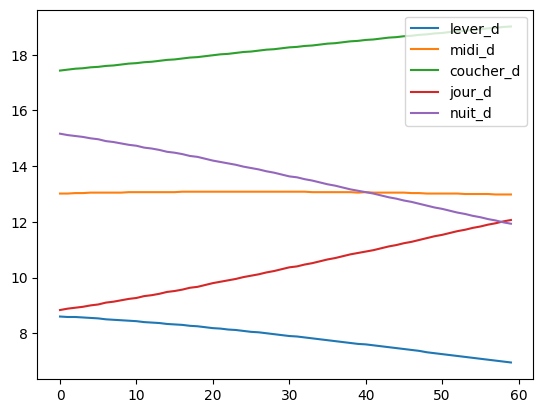

In [24]:
for col in cols:
    col_d = col+"_d"
    df[col_d] = df[col].map(to_decimal_time)
    df[col_d].plot(legend=True)

In [25]:
import matplotlib.pyplot as plt
df2 = df.set_index('date')
df2[['midi','midi_d']]


,midi,midi_d
date,,
"Vendredi, 19 Janvier 2024",13:01,13.016667
"Samedi, 20 Janvier 2024",13:01,13.016667
"Dimanche, 21 Janvier 2024",13:02,13.033333
"Lundi, 22 Janvier 2024",13:02,13.033333
"Mardi, 23 Janvier 2024",13:03,13.050000
"Mercredi, 24 Janvier 2024",13:03,13.050000
"Jeudi, 25 Janvier 2024",13:03,13.050000
"Vendredi, 26 Janvier 2024",13:03,13.050000
"Samedi, 27 Janvier 2024",13:03,13.050000


<AxesSubplot: xlabel='date'>

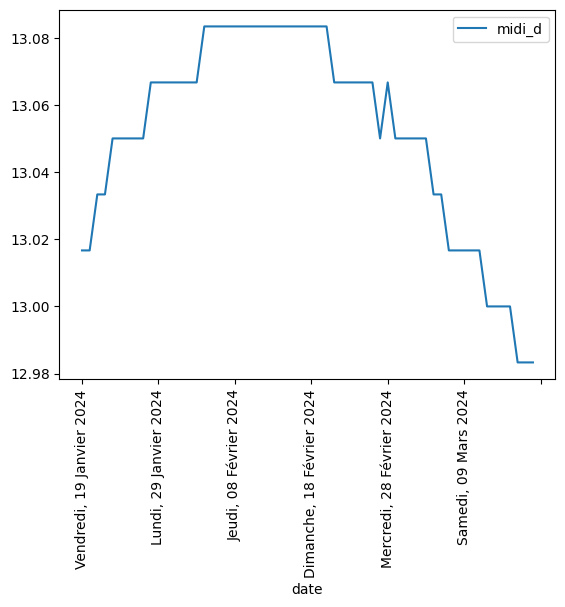

In [26]:
#plt.xticks(rotation=45, ha='right')
df2['midi_d'].plot(legend=True,rot=90)